## Data exploration and pre-processing
Basically, for any data analysis or machine learning project the following has to be conducted
- Data gtahering 
- Data assessing 
- Data ceaning 

## Data gathering has been allready done

## Data assessing 
- Assessing is the second and it is assessed to inspect data for two things:
 - **Data quality issues**: Data that has quality issues have issues with content like missing, duplicate, or incorrect data. 
 - **Lack of tidiness**: Data that has specific structural issues

You can search for these issues in two ways:
- Visually by scrolling
- Programmatically using code

for this project I used programmatic Assessment using the following methods 
- .head (DataFrame and Series)
- .tail (DataFrame and Series)
- .sample (DataFrame and Series)
- .info (DataFrame only)
- .describe (DataFrame and Series)
- and other

### some methods associated with quality issue
- .value_counts 
- .duplicates 
- .sort_values 
- sum of .isnull 

In [1]:
# loding liberaries
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_twitterData_data.csv')

In [3]:
df.head(2)

,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,0.190625,-0.125,en,4,2,i_ameztoy,20497,2621,NaN,City,i_ameztoy,NaN
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,0.100000,-0.100,en,691,201,ZIisq,65,272,NaN,"China, Taiwan",IndoPac_Info,NaN


In [4]:
# shape info
df.shape

(21997, 15)

In [5]:
# checking against null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21997 entries, 0 to 21996
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          21997 non-null  object 
 1   source              21997 non-null  object 
 2   original_text       21997 non-null  object 
 3   subjectivity        21997 non-null  float64
 4   polarity            21997 non-null  float64
 5   lang                21997 non-null  object 
 6   favorite_count      21997 non-null  int64  
 7   retweet_count       21997 non-null  int64  
 8   original_author     21997 non-null  object 
 9   followers_count     21997 non-null  int64  
 10  friends_count       21997 non-null  int64  
 11  possibly_sensitive  6190 non-null   object 
 12  hashtags            19138 non-null  object 
 13  user_mentions       18695 non-null  object 
 14  place               12106 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.5+

In [6]:
# satitstical information 
df.describe()

,subjectivity,polarity,favorite_count,retweet_count,followers_count,friends_count
count,21997.000000,21997.000000,21997.000000,21997.000000,2.199700e+04,21997.000000
mean,0.283878,0.061334,852.241033,176.768241,1.796985e+04,1563.237305
std,0.290964,0.223716,3106.276392,498.466921,3.030684e+05,4358.923487
min,0.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,2.000000,2.000000,5.700000e+01,137.000000
50%,0.200000,0.000000,115.000000,38.000000,2.840000e+02,487.000000
75%,0.469048,0.133333,655.000000,187.000000,1.324000e+03,1599.000000
max,1.000000,1.000000,65170.000000,17409.000000,1.449852e+07,208360.000000


In [7]:
# checking null
df.isnull().any().sum()

4

In [13]:
#checking against duplicated observation
df.duplicated().any().sum()

0

In [9]:
## unique value and ther number of appearance in decending orde
df['polarity'].value_counts()

 0.000000    8982
-0.100000     973
 0.133333     782
 0.050000     502
 0.500000     502
             ... 
-0.014773       1
 0.478788       1
 0.059375       1
 0.010000       1
 0.207143       1
Name: polarity, Length: 829, dtype: int64

In [10]:
# number of unique values
df['polarity'].nunique()

829

In [11]:
df['polarity'].sort_values()

15122   -1.0
2909    -1.0
7448    -1.0
15248   -1.0
7920    -1.0
        ... 
21693    1.0
13630    1.0
20442    1.0
20140    1.0
9778     1.0
Name: polarity, Length: 21997, dtype: float64

In [12]:
#cheking source and orginal_text columns
df[['source','original_text']].head(3)

,source,original_text
0,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...
1,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...
2,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a..."


### Result of the assesmement
- Created_at datatype issue
- missing vaues are there
- the source and original text needs to be cleaned

### Cleaning  
it helps as to solve the following 
- duplicate data
- missing data
- inaccurate data
- incomplete data

In [14]:
# handling with missing values with drop method
df = df.dropna()

In [15]:
# checking against missing value
df.isnull().any().sum()

0

In [16]:
# habdling created_at datatype
df['created_at'] =pd.to_datetime(df['created_at'])

In [17]:
#checking datatype
df['created_at'].dtype

datetime64[ns, UTC]

In [19]:
# handling the source and original text needs to be cleaned and creating new column


In [28]:
#Method to find hashtags from tweets


### Visualization 

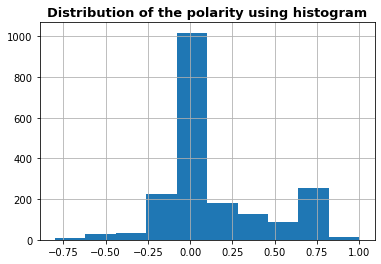

In [22]:
# the plority distribution
df.polarity.hist();
plt.title("Distribution of the polarity using histogram", fontsize = 13, fontweight = 'bold');

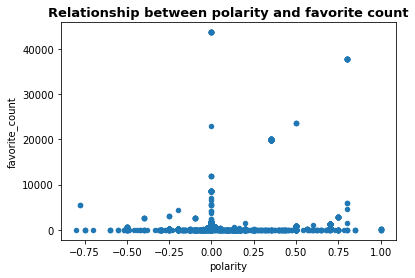

In [23]:
# polarity vs favorite_count using scatter plot
df.plot(x = 'polarity', y = 'favorite_count', kind = 'scatter')
plt.title("Relationship between polarity and favorite count", fontsize = 13, fontweight = 'bold');

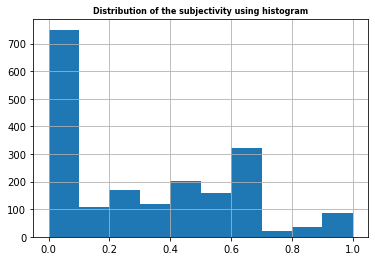

In [24]:
# the distribution of subjectivity
df.subjectivity.hist();
plt.title("Distribution of the subjectivity using histogram", fontsize = 8, fontweight = 'bold');

## Topic Modeling 

In [59]:
# inporting packages 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Ekubay\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
#data loader class
# class DataLoader:
#   def __init__(self,dir_name,file_name):
#     self.dir_name=dir_name
#     self.file_name = file_name
    
 
#   def read_csv(self):
#     os.chdir(self.dir_name)
#     tweets_df=pd.read_csv(self.file_name)
#     return tweets_df

In [ ]:
#object creation
#DataLoader_obj= df

In [27]:
df.head(1)

,created_at,source,original_text,subjectivity,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
5,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.5,0.2,en,116,36,GraceCh15554845,207,54,False,Taiwan,benedictrogers,"Melbourne, Victoria"


In [67]:
df['clean_text'] = df['original_text']

In [68]:
df.head(1)

,created_at,source,original_text,subjectivity,clean_text,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
5,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.5,RT @benedictrogers: We must not let this happe...,0.2,en,116,36,GraceCh15554845,207,54,False,Taiwan,benedictrogers,"Melbourne, Victoria"


In [75]:

tweets_df = df
tweets_df

,created_at,source,original_text,subjectivity,clean_text,polarity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
5,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.500000,RT @benedictrogers: We must not let this happe...,0.200000,en,116,36,GraceCh15554845,207,54,False,Taiwan,benedictrogers,"Melbourne, Victoria"
36,2022-08-07 22:26:25+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @ChinaInfo777: #PinkFloyd Roger Waters tell...,0.000000,RT @ChinaInfo777: #PinkFloyd Roger Waters tell...,0.000000,en,23,5,nhohn2011,870,508,False,"PinkFloyd, Taiwan, China",ChinaInfo777,"Florida, USA"
39,2022-08-07 22:25:37+00:00,"<a href=""http://twitter.com/download/android"" ...","RT @WilliamYang120: ""For too long, #Taiwan has...",0.200000,"RT @WilliamYang120: ""For too long, #Taiwan has...",-0.025000,en,311,84,hoggothoaryhost,44,60,False,Taiwan,WilliamYang120,Hong Kong
43,2022-08-07 22:25:05+00:00,"<a href=""https://help.twitter.com/en/using-twi...",RT @odisseoisback: #Corfu #Greece🇬🇷\n#Summer #...,0.000000,RT @odisseoisback: #Corfu #Greece🇬🇷\n#Summer #...,0.000000,en,0,2,hephaistos_ai,4161,208,False,"Corfu, Greece, Summer, Beaches, Travel, Excurs...",odisseoisback,Paris
48,2022-08-07 22:24:44+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.500000,RT @benedictrogers: We must not let this happe...,0.200000,en,116,36,hoggothoaryhost,44,60,False,Taiwan,benedictrogers,Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978,2022-08-06 18:04:09+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @jenniferatntd: Head of #Taiwan's #missile ...,0.400000,RT @jenniferatntd: Head of #Taiwan's #missile ...,-0.200000,en,194,99,threadmaxwhispe,657,864,False,"Taiwan, missile",jenniferatntd,Land of Ethan South Dakota
21986,2022-08-06 18:03:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Minister Wu is crystal clear in his @BBCNews i...,0.419444,Minister Wu is crystal clear in his @BBCNews i...,0.158333,en,0,0,TECO_Toronto,955,202,False,"Taiwan, StandWithTaiwan, DefendDemocracy","BBCNews, SpeakerPelosi","Toronto, Canada"
21987,2022-08-06 18:03:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @SpokespersonCHN: #PLA Live-fire military d...,0.250000,RT @SpokespersonCHN: #PLA Live-fire military d...,-0.100000,en,2611,405,mumaralid,1164,605,True,"PLA, Taiwan",SpokespersonCHN,Driver
21989,2022-08-06 18:03:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @jenniferatntd: Head of #Taiwan's #missile ...,0.400000,RT @jenniferatntd: Head of #Taiwan's #missile ...,-0.200000,en,194,99,9thousandbytes,401,858,False,"Taiwan, missile",jenniferatntd,Northern Virginia


In [79]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text

    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet


tweets_df['clean_text'] = tweets_df['original_text'].map(lambda x: cleaner(x))
tweets_df['clean_text']

5        : We must not let this happen . We must be rea...
36              : Roger it as it is . is a part of China !
39       : " For too long , been , and isolated from th...
43       : 🇬🇷 Summer Travel Excursion 👉 check availabil...
48       : We must not let this happen . We must be rea...
                               ...                        
21978    : Head of ' s missile is found dead in hotel ....
21986    Minister is crystal clear in his interview . '...
21987                 : Live - fire military in the with .
21989    : Head of ' s missile is found dead in hotel ....
21993     : A good of China ' s missile on on August 4th .
Name: clean_text, Length: 1976, dtype: object

In [42]:
class PrepareData:
  def __init__(self,df):
    self.df=df
  def preprocess_data(self):
    
    #tweets_df = self.df.loc[self.df['lang'] =="en"]

    
    #text Preprocessing
    tweets_df['clean_text']=tweets_df['clean_text'].astype(str)
    tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: x.lower())
    tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['clean_text']]
    word_list = [sent.split() for sent in sentence_list]
    # print(word_list)

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list) #generate unique tokens
    #  we can see the word to unique integer mapping
    # print(word_to_id.token2id)
    # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]


    return word_list, word_to_id, corpus_1

In [46]:
PrepareData_obj=PrepareData(tweets_df)
tweets_df['clean_text']
#word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

5        RT @benedictrogers: We must not let this happe...
36       RT @ChinaInfo777: #PinkFloyd Roger Waters tell...
39       RT @WilliamYang120: "For too long, #Taiwan has...
43       RT @odisseoisback: #Corfu #Greece🇬🇷\n#Summer #...
48       RT @benedictrogers: We must not let this happe...
                               ...                        
21978    RT @jenniferatntd: Head of #Taiwan's #missile ...
21986    Minister Wu is crystal clear in his @BBCNews i...
21987    RT @SpokespersonCHN: #PLA Live-fire military d...
21989    RT @jenniferatntd: Head of #Taiwan's #missile ...
21993    RT @IndoPac_Info: A good infographic of #China...
Name: clean_text, Length: 1976, dtype: object

In [44]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [45]:
print(id_words)

[[('be', 1), ('benedictrogers', 1), ('defend', 1), ('happen', 1), ('httpstcoz4rv925jhi', 1), ('let', 1), ('must', 3), ('not', 1), ('ready', 1), ('rt', 1), ('taiwan', 1), ('this', 1), ('we', 3)], [('rt', 1), ('taiwan', 1), ('a', 1), ('as', 1), ('china', 1), ('chinainfo777', 1), ('httpstcorj64fx6f33', 1), ('is', 2), ('it', 2), ('of', 1), ('part', 1), ('pinkfloyd', 1), ('roger', 1), ('tells', 1), ('waters', 1)], [('rt', 1), ('taiwan', 1), ('and', 2), ('banned', 1), ('been', 1), ('bullied', 1), ('for', 1), ('from', 2), ('has', 1), ('international', 1), ('isolated', 1), ('long', 1), ('marginalized', 1), ('organiz…', 1), ('the', 1), ('too', 1), ('williamyang120', 1), ('world', 1)], [('rt', 1), ('availability', 1), ('beaches', 1), ('corfu', 1), ('excursion', 1), ('greece🇬🇷', 1), ('hol…', 1), ('httpstcobbzwjjwgjp', 1), ('odisseoisback', 1), ('on', 1), ('summer', 1), ('travel', 1), ('vacanze', 1), ('👉check', 1)], [('be', 1), ('benedictrogers', 1), ('defend', 1), ('happen', 1), ('httpstcoz4rv925

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

## Sentiment Analysis